# 1. Khai báo thư viện

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 2. Thu thập dữ liệu

In [2]:
df = pd.read_csv('./data/DSPhongTro_DaXuLy.csv',sep='\t')
df.head()

,ID,Địa chỉ,Diện tích,Số phòng ngủ,Số toilet,Nội thất,Mức giá,Ngày đăng tin
0,41278673.0,14,20.0,1.0,1.0,2,4.0,2024-10-22
1,41290558.0,14,60.0,2.0,2.0,0,10.0,2024-10-23
2,41198378.0,3,45.0,1.0,1.0,0,7.3,2024-10-23
3,41098096.0,17,28.0,1.0,1.0,0,2.8,2024-10-23
4,41298012.0,1,30.0,1.0,1.0,2,4.8,2024-10-23


In [3]:
# thêm vào tiền xử lý
df = df[df['Mức giá']<100.0]

# 3. Khám phá dữ liệu

## 3.1 Cấu trúc tập dữ liệu

In [4]:
n_rows, n_cols = df.shape
print("Số dòng: ", n_rows)
print("Số cột: ", n_cols)

Số dòng:  4237
Số cột:  8


## 3.2 Khám phá các dòng dữ liệu

### 3.2.1 Lấy ngẫu nhiên 1 dòng dữ liệu

In [5]:
df.sample()

,ID,Địa chỉ,Diện tích,Số phòng ngủ,Số toilet,Nội thất,Mức giá,Ngày đăng tin
54,41250578.0,1,30.0,1.0,1.0,2,5.6,2024-10-18


### 3.2.2 Ý nghĩa của từng dòng dữ liệu

Mỗi dòng trong tập dữ liệu cung cấp thông tin chi tiết của từng phòng trọ cho thuê được đăng bài vào tháng 10 và 11/2024 trên trang web. Mỗi dòng có ý nghĩa rất quan trọng trong việc thực hiện phân tích giá phòng trọ và dự đoán xu hướng giá cả trong tương lai của nhóm.

### 3.2.3 Có dòng nào bị trùng lắp dữ liệu không?

In [6]:
have_duplicated_rows = df.duplicated().any()

In [7]:
if have_duplicated_rows:
    print("Dữ liệu tồn tại dòng bị trùng lắp cần tiền xử lý lại")
else:
    print("Không có dòng dữ liệu nào bị trùng lắp cả")

Không có dòng dữ liệu nào bị trùng lắp cả


## 3.3 Khám phá các cột dữ liệu

### 3.3.1 Các cột dữ liệu

In [8]:
df.columns

Index(['ID', 'Địa chỉ', 'Diện tích', 'Số phòng ngủ', 'Số toilet', 'Nội thất',
       'Mức giá', 'Ngày đăng tin'],
      dtype='object')

### 3.3.2 Ý nghĩa của mỗi cột dữ liệu

#### Ý nghĩa

- `ID`: Mã định danh của phòng trọ.
- `Địa chỉ`: Vị trí quận nơi căn phòng được cho thuê (mã hóa số).
- `Diện tích`: Kích thước phòng (m²).
- `Số phòng ngủ`: Phòng trọ có bao nhiêu phòng ngủ.
- `Số toilet`: Phòng trọ có bao nhiêu phòng vệ sinh.
- `Nội thất`: Tình trạng nội thất trong phòng (không có, cơ bản, đầy đủ, cao cấp).
- `Mức giá`: Giá thuê phòng trọ theo triệu đồng/tháng.
- `Ngày đăng tin`: Ngày bài đăng xuất hiện, cung cấp thông tin về thời gian đăng tải.

#### Bảng phân loại

| **Thuộc tính**        | **Giá trị số/Giá trị phân loại** | **Liên tục/Rời rạc** | **Thứ tự/Không có thứ tự** |
|-----------------------|----------------------------------|----------------------|----------------------------|
| **ID**               | Giá trị phân loại               | Rời rạc             | Không có thứ tự           |
| **Địa chỉ**          | Giá trị phân loại               | Rời rạc             | Không có thứ tự           |
| **Diện tích**        | Giá trị số                      | Liên tục            | Không có thứ tự           |
| **Số phòng ngủ**     | Giá trị số                      | Rời rạc             | Có thứ tự                 |
| **Số toilet**        | Giá trị số                      | Rời rạc             | Có thứ tự                 |
| **Nội thất**         | Giá trị phân loại               | Rời rạc             | Có thứ tự                 |
| **Mức giá**          | Giá trị số                      | Liên tục            | Không có thứ tự           |
| **Ngày đăng tin**    | Giá trị phân loại               | Rời rạc             | Không có thứ tự           |


### 3.3.3 Kiểu dữ liệu hiện tại của từng cột

In [9]:
df.dtypes

ID               float64
Địa chỉ            int64
Diện tích        float64
Số phòng ngủ     float64
Số toilet        float64
Nội thất           int64
Mức giá          float64
Ngày đăng tin     object
dtype: object

### 3.3.4 Ý nghĩa của một số cột dữ liệu đã mã hóa

#### Địa chỉ

In [10]:
info_area = pd.read_csv('./data/address.txt',header=None,sep=':')
info_area.columns= ['Địa chỉ','Mã']
info_area

,Địa chỉ,Mã
0,Quận 1,1
1,Quận 3,3
2,Quận 4,4
3,Quận 5,5
4,Quận 6,6
5,Quận 7,7
6,Quận 8,8
7,Quận 10,10
8,Quận 11,11
9,Quận 12,12


#### Nội thất

In [11]:
info_furniture = pd.read_csv('./data/furniture.txt',header=None,sep=':')
info_furniture.columns= ['Nội thất','Mã']
info_furniture

,Nội thất,Mã
0,Không,0
1,Cơ bản,1
2,Đầy đủ,2
3,Cao cấp,3


### 3.3.5 Phân bố của các cột dữ liệu số

Với mỗi cột dữ liệu số ta sẽ tính:

- `mising_rato`: tỷ lệ phần trăm (từ 0 đến 100) của giá trị bị thiếu
- `min`: giá trị nhỏ nhất
- `lower_quartile`: giá trị tứ phân vị thứ nhất (25%)
- `median`: giá trị tứ phân vị thứ hai (50%)
- `upper_quartile`: giá trị tứ phân vị thứ ba (75%)
- `min`: giá trị nhỏ nhất

In [12]:
def missing_ratio(col):
    return (col.isna().mean()*100).round(1)

def lower_quartile(col):
    return col.quantile(0.25).round(1)

def median(col):
    return col.quantile(0.5).round(1)

def upper_quartile(col):
    return col.quantile(0.75).round(1)

#Lấy ra các cột dữ liệu số
num_cols = df[['Diện tích','Số phòng ngủ','Số toilet','Mức giá']].copy()

#Tính toán các thông sô
num_cols_info = num_cols.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

num_cols_info

,Diện tích,Số phòng ngủ,Số toilet,Mức giá
missing_ratio,0.0,0.0,0.0,0.0
min,2.0,1.0,1.0,1.0
lower_quartile,25.0,1.0,1.0,3.9
median,30.0,1.0,1.0,5.0
upper_quartile,35.0,1.0,1.0,6.2
max,100.0,8.0,6.0,28.0


### 3.3.6 Phân bố của các cột dữ liệu phân loại

Đối với các cột có kiểu dữ liệu không phải số nhóm sẽ tính:

- `missing_ratio`: tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu.
- `num_values`: số lượng giá trị (các giá trị ở đây là các giá trị khác nhau).
- `value_ratios`: tỷ lệ phần trăm (từ 0 đến 100) của mỗi giá trị được sắp xếp theo tỷ lệ phần trăm giảm dần (không xét giá trị thiếu, tỷ lệ là tỷ lệ so với số giá trị không thiếu).

**Chú thích:**
- Ở đây sẽ không xét thuộc tính `ID`, vì xét phân bố của cột dữ liệu này không có quá nhiều ý nghĩa.
- Ở giá trị `value_ratios` của thuộc tính `Ngày đăng tin` vì có quá nhiều giá trị nên sẽ quy đổi về dạng `tháng`-`năm` để tính tỉ lệ tránh hiển thị quá nhiều.

In [13]:
def num_values(col):
    return len(col.dropna().unique())

def value_ratios(col):
    if col.name == 'Ngày đăng tin':
        col = col.str[:7]
    return col.value_counts(normalize=True).mul(100).round(1).to_dict()
    
pd.set_option('display.max_colwidth', None)

#Lấy ra các cột dữ liệu phân loại
cat_cols = df[['Địa chỉ','Nội thất','Ngày đăng tin']].copy()

#Tính toán các thông số
cat_cols_info = cat_cols.agg([missing_ratio, num_values, value_ratios])

cat_cols_info 

,Địa chỉ,Nội thất,Ngày đăng tin
missing_ratio,0.0,0.0,0.0
num_values,18,4,67
value_ratios,"{1: 16.1, 2: 15.9, 14: 11.7, 7: 9.6, 9: 8.8, 15: 6.1, 13: 5.9, 3: 5.7, 8: 4.1, 17: 3.9, 16: 3.8, 5: 2.3, 18: 1.8, 4: 1.7, 6: 1.3, 22: 0.9, 21: 0.3, 19: 0.1}","{2: 63.9, 0: 24.2, 1: 11.5, 3: 0.4}","{'2024-10': 50.5, '2024-11': 27.6, '2024-09': 12.4, '2024-12': 9.4}"


# 4. Trực qua hóa và phân tích dữ liệu

## 4.1 Phân tích cơ bản

### Phân bố của các giá trị số rời rạc

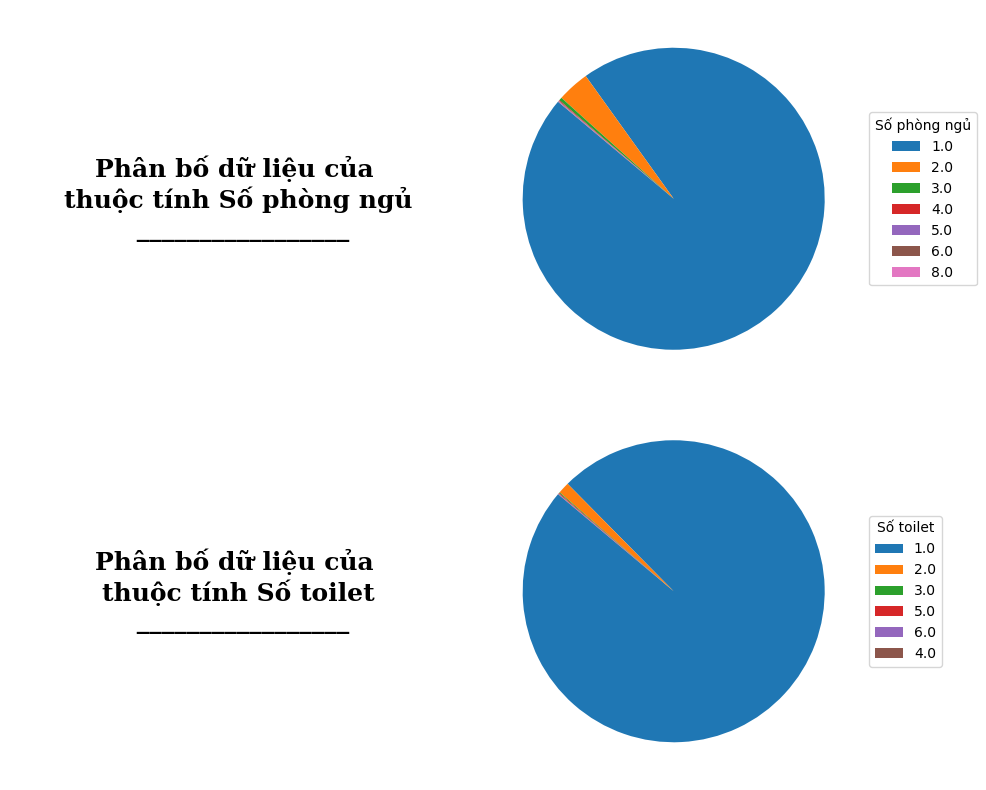

In [14]:
#Số phòng ngủ, Số toilet
num_discrete_cols = ['Số phòng ngủ', 'Số toilet']
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, col in enumerate(num_discrete_cols):
    axes[i, 0].spines["bottom"].set_visible(False)
    axes[i, 0].spines["left"].set_visible(False)
    axes[i, 0].spines["top"].set_visible(False)
    axes[i, 0].spines["right"].set_visible(False)
    axes[i, 0].tick_params(left=False, bottom=False)
    axes[i, 0].set_xticklabels([])
    axes[i, 0].set_yticklabels([])
    axes[i, 0].text(0.5, 0.5,
                f'Phân bố dữ liệu của \nthuộc tính {col}\n _________________',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=18, fontweight='bold',
                fontfamily='serif',
                color="#000000")
    
    count = df[col].value_counts()
    wedges, texts = axes[i, 1].pie(count.values, startangle=140)
    axes[i, 1].legend(wedges, [f"{label}" for label in count.index],
                      title=col, loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

#### Nhận xét

- Đối với phân bố dữ liệu của thuộc tính Số phòng ngủ:
    - Tần suất lớn nhất là 1 phòng ngủ, chiếm áp đảo so với các giá trị khác.
    - Các giá trị khác từ 2 trở đi xuất hiện rất ít.
- Đối với phân bố dữ liệu của thuộc tính Số toilet:
    - Tần suất lớn nhất là 1 toilet, chiếm áp đảo so với các giá trị khác.
    - Các giá trị khác từ 2 trở đi xuất hiện rất ít.

Điều này cho thấy các phòng trọ có từ 2 phòng ngủ và 2 toilet trở lên là rất hiếm, dữ liệu có sự mất cân đối nghiêm trọng. Cần xem xét lại các thuộc tính này trong việc sử dụng mô hình học máy vì dữ liệu lệch quá nhiều, có thể ảnh hưởng đến kết quả dự đoán.

### Phân bố các giá trị số liên tục

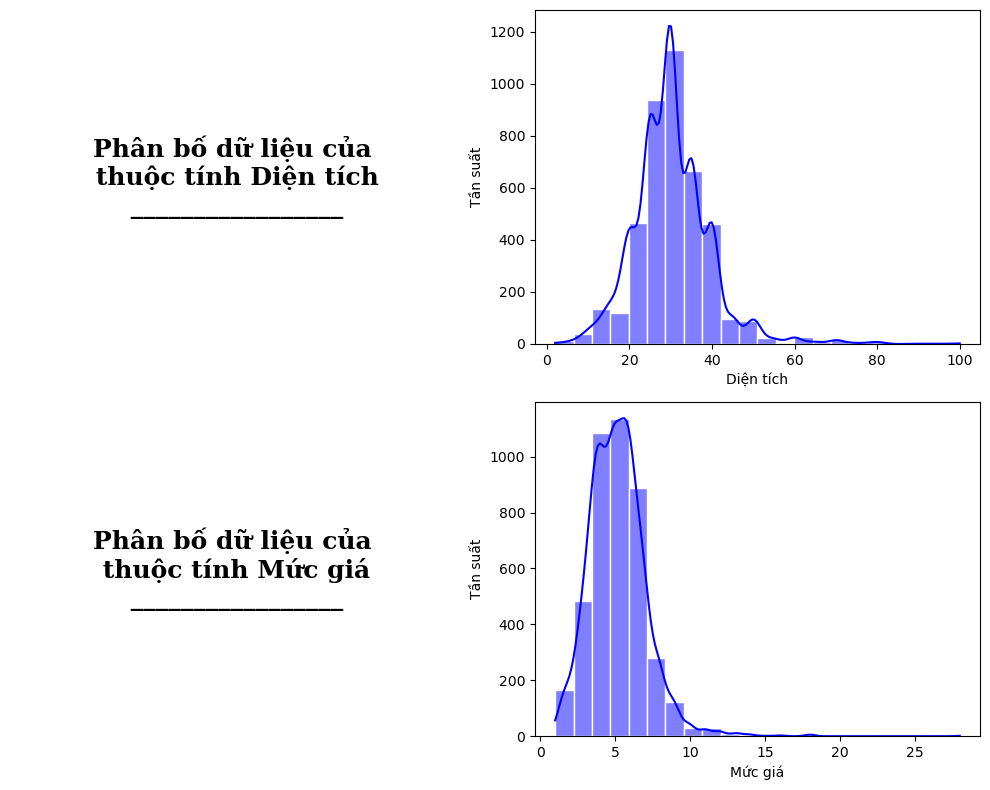

In [15]:
#Số phòng ngủ, Số toilet
num_continous_cols = ['Diện tích', 'Mức giá']
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, col in enumerate(num_continous_cols):
    axes[i, 0].spines["bottom"].set_visible(False)
    axes[i, 0].spines["left"].set_visible(False)
    axes[i, 0].spines["top"].set_visible(False)
    axes[i, 0].spines["right"].set_visible(False)
    axes[i, 0].tick_params(left=False, bottom=False)
    axes[i, 0].set_xticklabels([])
    axes[i, 0].set_yticklabels([])
    axes[i, 0].text(0.5, 0.5,
                f'Phân bố dữ liệu của\n thuộc tính {col}\n _________________',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=18, fontweight='bold',
                fontfamily='serif',
                color="#000000")
    sns.histplot(data=df,x=col, kde=True, ax=axes[i, 1], color='blue',bins=22,edgecolor='white')
    axes[i,1].set_ylabel('Tần suất')

plt.tight_layout()
plt.show()

#### Nhận xét

- Đối với biểu đồ phân bố dữ liệu của thuộc tính diện tích
    - Diện tích rơi vào khoảng từ 10 đến 50m2, với đỉnh phân phối khoảng 30m2, cho thấy đây là mức diện tích phổ biến của nhà trọ cho thuê trong tập dữ liệu.
    - Phần đuôi từ mức diện tích 50m2 trở đi kéo dài cho thấy tồn tại các giá trị ngoại lai. Điều này thể hiện sự mất cân đối của biểu đồ.
- Đối với biểu đồ phân bố dữ liệu của thuộc tính Mức giá
    - Mức giá rơi vào khoảng 3 đến triệu 7 triệu, với đỉnh phân phối khoảng 5 triệu, cho thấy đây là giá tiền phổ biến của nhà trọ cho thuê trong tập dữ liệu.
    - Phần đuôi từ mức 10 triệu trở đi kéo dài cho thấy tồn tại các giá trị ngoại lại. Điều này thể hiện sự mất cân đối của biểu đồ.

Nhìn chung cả hai biểu đồ đều cho thấy tồn tại các giá trị ngoại lai, để phục vụ cho việc áp dụng mô hình học máy để dự đoán thì các dữ liệu này nên cần được xử lý.

### Phân bố của các giá trị phân loại

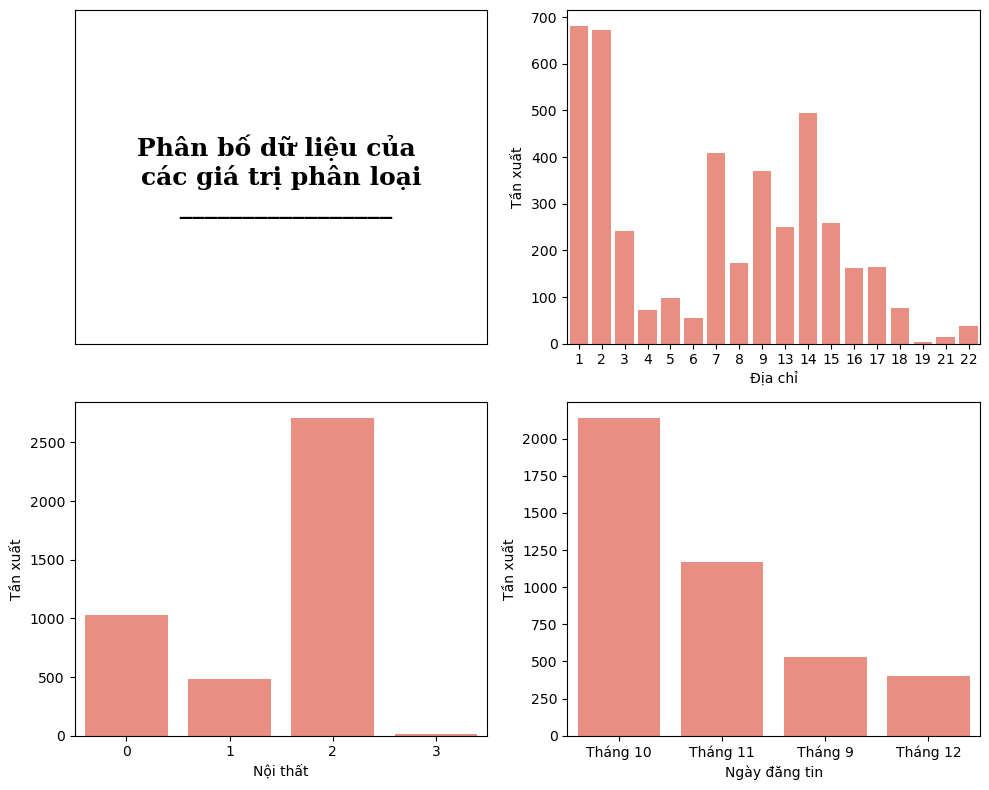

In [16]:
#'Địa chỉ','Nội thất','Ngày đăng tin'
cate_cols = ['Địa chỉ','Nội thất','Ngày đăng tin']
tmp_df = df.copy()
tmp_df['Ngày đăng tin'] = tmp_df['Ngày đăng tin'].str[:7]

label_mapping_date = {
    '2024-10': 'Tháng 10',
    '2024-09': 'Tháng 9',
    '2024-11': 'Tháng 11',
    '2024-12': 'Tháng 12'
}
tmp_df['Ngày đăng tin'] = tmp_df['Ngày đăng tin'].replace(label_mapping_date)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].tick_params(left=False, bottom=False)
axes[0, 0].set_xticklabels([])
axes[0, 0].set_yticklabels([])
axes[0, 0].text(0.5, 0.5,
            f'Phân bố dữ liệu của \ncác giá trị phân loại\n _________________',
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=18, fontweight='bold',
            fontfamily='serif',
            color="#000000")


for i, col in enumerate(cate_cols):
    r = (i + 1) // 2
    c = (i + 1) % 2
    
    count = tmp_df[col].value_counts()
    sns.barplot(x=count.index, y=count.values,ax=axes[r,c], color='salmon')
    axes[r,c].set_ylabel('Tần xuất')

plt.tight_layout()
plt.show()

#### Nhận xét

- Đối với phân bố dữ liệu của thuộc tính Địa chỉ:
    - Các địa chỉ 1 và 2 (quận 1 và quận 2) có số lượng phòng trọ nhiều nhất với tần xuất gần 700 có thể là do đặc điểm kinh tế - xã hội hoặc nhu cầu thuê trọ cao tại đây.
    - Ngược lại, một số địa chỉ như 19, 20, và 22 (Cần Giờ, Củ Chi và Hóc Môn) có số lượng rất thấp, cho thấy sự chênh lệch đáng kể về mức độ cung cấp nhà cho thuê.
    - Các địa chỉ có tần xuất cao thứ hai có thể kể đến như 7, 9, 14 (quận 7, quận 9 và Tân Bình).
- Đối với phân bố dữ liệu của thuộc tính Nội thất:
    - Tần xuất của nội thất 2 (Đầy đủ) chiếm cao nhất và có phần áp đảo với trên 2500, cho thấy xu hướng trang bị nội thất đầy đủ ở các phòng trọ cho thuê là nhiều nhất trong tập dữ liệu.
    - Tần xuất của nội thất 0 và 1 (Không và Cơ bản) chiểm lần lượt là 1000 và 500.
    - Thấp nhất là tần xuất của nội thất 3 (Cao cấp) cho thấy các chủ trọ thường không quá tập trung vào việc trang bị nội thất cao cấp cho các phòng trọ.
- Đối với Ngày đăng tin:
    - Tháng 10 là tháng được đăng tin tìm kiếm phòng trọ nhiều nhất trong tập dữ liệu này với tần xuất trên 2000, cao hơn rất nhiều so với các tháng còn lại.
    - Tháng 9 và tháng 12 là tháng có tần xuất đăng tin ít nhất khi đạt tần xuất khoảng 500 và dưới 500.